In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from pandasgui import show
gui  = show (dropped)

NameError: name 'dropped' is not defined

In [3]:
ds_02 =  pd.read_csv('merge1-Copy1.csv')

In [16]:
ds_02.keys()

Index(['Unnamed: 0', 'tconst', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres'],
      dtype='object')

In [4]:
ds_01 =  pd.read_csv('merge1.csv')

In [5]:
ds_01.head()

,Unnamed: 0,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [5]:
dropped = ds_02.drop(['Unnamed: 0','tconst','averagerating','numvotes','primary_title','runtime_minutes'], axis=1)

In [18]:
dropped.sort_values(by='start_year', ascending=False)

,original_title,start_year,genres
0,Laiye Je Yaarian,2019,Romance
23991,"Out of Sight, Out of Mind",2019,Drama
24002,I Hate Kids,2019,Comedy
24012,Use Me,2019,Thriller
24028,Parningsmarknaden,2019,Documentary
...,...,...,...
36328,Taliya.Date.Com,2010,"Biography,Comedy,Documentary"
36325,Israel vs Israel,2010,Documentary
17412,Çok Filim Hareketler Bunlar,2010,Comedy
17411,Indiana Jones und der Speer des Schicksals,2010,"Action,Adventure"


In [7]:
dropped.keys()

Index(['original_title', 'start_year', 'genres'], dtype='object')

In [8]:
dropped.tail()

,original_title,start_year,genres
73851,Caisa,2018,Documentary
73852,Code Geass: Lelouch of the Rebellion Episode III,2018,"Action,Animation,Sci-Fi"
73853,Sisters,2019,"Action,Drama"
73854,The Projectionist,2019,Documentary
73855,Sathru,2019,Thriller


In [6]:
plt_x = []
plt_x.extend(dropped['start_year'].tolist())
years = []
[years.append(x)for x in plt_x if x not in years]

[None, None, None, None, None, None, None, None, None, None]

In [7]:
years

[2019, 2010, 2014, 2011, 2016, 2013, 2015, 2012, 2017, 2018]

In [7]:
plt_y = []
plt_y.extend(dropped['genres'].tolist())



Need to clean/split and remove duplicates for plt_y

2 seperate lists, 1 with genres to years and 2 with multiple genres and year

#csv to array then explode

for year in years:
    genres = dropped.loc[dropped["start_year"].isin([year])]
    temp = genres.explode("genres")
    temp = temp.groupby("genres")
    
    print(temp.agg(["count"]))

In [22]:
#dropped.plot(plt_x,plt_y)
#x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
#genre_01 = [count in 2010, 2011, 2012...]
#genre_02 = [count in 2010, 2011, 2012...]

In [43]:
#working function
for year in years:
    genres = dropped.loc[dropped["start_year"].isin([year])]["genres"]
    dropped.groupby("genres")
    finalGenres = {}
    for genre in genres:
        if type(genre) == str:
            vals = genre.split(",")
            for val in vals:
                if(val in finalGenres):
                    finalGenres[val] = finalGenres[val]+1
                else:
                    finalGenres[val] = 1
    
    print(year,finalGenres)
    print(finalGenres.keys())
    print(finalGenres.items())
    [
        [
            col1Name,col2Name
        ],
        [
            val,val
        ]
        
    ]
    break
    

2019 {'Romance': 168, 'Documentary': 401, 'Drama': 900, 'Thriller': 261, 'Action': 204, 'Comedy': 553, 'Crime': 125, 'Horror': 204, 'Sci-Fi': 65, 'Adventure': 107, 'Animation': 61, 'Biography': 83, 'Family': 83, 'War': 25, 'Music': 38, 'History': 40, 'Fantasy': 61, 'Mystery': 72, 'Sport': 31, 'Musical': 16, 'Western': 6, 'News': 2}
dict_keys(['Romance', 'Documentary', 'Drama', 'Thriller', 'Action', 'Comedy', 'Crime', 'Horror', 'Sci-Fi', 'Adventure', 'Animation', 'Biography', 'Family', 'War', 'Music', 'History', 'Fantasy', 'Mystery', 'Sport', 'Musical', 'Western', 'News'])
dict_items([('Romance', 168), ('Documentary', 401), ('Drama', 900), ('Thriller', 261), ('Action', 204), ('Comedy', 553), ('Crime', 125), ('Horror', 204), ('Sci-Fi', 65), ('Adventure', 107), ('Animation', 61), ('Biography', 83), ('Family', 83), ('War', 25), ('Music', 38), ('History', 40), ('Fantasy', 61), ('Mystery', 72), ('Sport', 31), ('Musical', 16), ('Western', 6), ('News', 2)])


NameError: name 'col1Name' is not defined

In [8]:
df = pd.DataFrame()
for year in years:
    
    print("***********",year,"****************")
    genres = dropped.loc[dropped["start_year"].isin([year])]["genres"]
    dropped.groupby("genres")
    finalGenres = {}
    for genre in genres:
        if type(genre) == str:
            vals = genre.split(",")
            for val in vals:
                if(val in finalGenres):
                    finalGenres[val] = finalGenres[val]+1
                else:
                    finalGenres[val] = 1
    output = {"genres":[],"count":[]}
    for elem in finalGenres:
        output["genres"].append(elem)
        output["count"].append(finalGenres[elem])
    frame = pd.DataFrame(output)
    frame["year"]=year
    df  = df.append(frame) 
    

*********** 2019 ****************
*********** 2010 ****************
*********** 2014 ****************
*********** 2011 ****************
*********** 2016 ****************
*********** 2013 ****************
*********** 2015 ****************
*********** 2012 ****************
*********** 2017 ****************
*********** 2018 ****************


In [28]:
df.head()

,genres,count,year
0,Romance,168,2019
1,Documentary,401,2019
2,Drama,900,2019
3,Thriller,261,2019
4,Action,204,2019


In [1]:
plot_1 = df.pivot(columns="genres", index="year", values="count").T.sort_values(by=[2019],ascending=False).T.plot(kind="bar", stacked=True)
plt.legend(ncol=5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),
         fancybox=True, shadow=True, ncol=5)
plt.xlabel("Movie release year")
plt.ylabel("Genre count")
plt.title("Most popular genre")

NameError: name 'df' is not defined

In [3]:
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

Documentary = [2902, 1853, 1943, 2027, 2154, 2106, 2095, 2018, 1512, 401]
Drama = [2902, 3096, 3175, 3497, 3529, 3629, 3523, 3483, 3054, 900]
Comedy = [1606, 1759, 1826, 1895, 1987, 1951, 2013, 1914, 1786, 553]
Crime = [424, 466, 473, 507, 524,  538, 591, 532, 431, 125]
Thriller = [672, 713, 798, 936, 976, 1019, 1025, 956, 861, 261]
Romance = [642, 637, 653, 774, 842, 799, 769, 690, 615, 168]
Horror = [646, 699, 827, 810, 899, 885, 953, 961, 790, 204]
Mystery = [239, 275, 290, 323, 365, 374, 396, 395, 310, 72]
Action = [691, 692, 691, 717, 773, 807, 858, 854, 701, 204]
History = [274, 277, 352, 377, 428, 352, 277, 246, 202, 40]
Animation = [150, 199, 167, 169, 191, 196, 196, 210, 204, 61]
Fantasy = [188, 216, 210, 470, 240, 257, 275, 244, 214, 61]
Adventure = [313, 371, 371, 464, 454, 462, 467, 435, 373, 107]
Family = [299, 314, 364, 470, 466, 415, 353, 349, 299, 83]
Music = [193, 230, 249, 224, 272, 238, 173, 197, 154, 38]
Biography = [341, 382, 396, 521, 603, 499, 401, 334, 249, 83]
Musical = [82, 81, 80, 82, 77, 70, 87, 75, 71, 16]
Sci_Fi = [196, 200, 208, 260, 253, 271, 252, 281, 220, 65]
Sport = [93, 124, 104, 142, 156, 141, 149, 124, 115, 31]
News = [62, 124, 86, 104, 127, 90, 22, 10, 5, 2]
War  = [90, 99, 82, 71, 108, 103, 95, 99, 81, 25]
Western  = [25, 30, 31, 27, 39, 28, 24, 37, 33, 6]
Reality_TV= [3, 0, 1, 3, 1, 4, 2, 1, 2, 0]


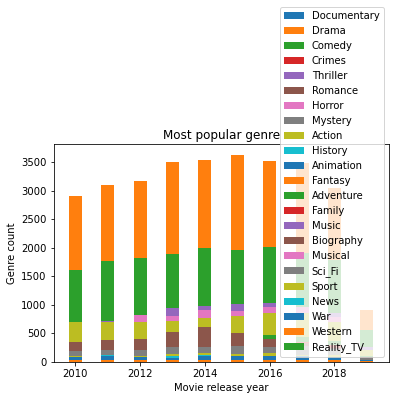

In [11]:
plt.bar(x,Documentary,0.4,label="Documentary")
plt.bar(x,Drama,0.4,label="Drama")
plt.bar(x,Comedy,0.4,label="Comedy")
plt.bar(x,Crime,0.4,label="Crimes")
plt.bar(x,Thriller,0.4,label="Thriller")
plt.bar(x,Romance,0.4,label="Romance")
plt.bar(x,Horror,0.4,label="Horror")
plt.bar(x,Mystery,0.4,label="Mystery")
plt.bar(x,Action,0.4,label="Action")
plt.bar(x,History,0.4,label="History")
plt.bar(x,Animation,0.4,label="Animation")
plt.bar(x,Fantasy,0.4,label="Fantasy")
plt.bar(x,Adventure,0.4,label="Adventure")
plt.bar(x,Family,0.4,label="Family")
plt.bar(x,Music,0.4,label="Music")
plt.bar(x,Biography,0.4,label="Biography")
plt.bar(x,Musical,0.4,label="Musical")
plt.bar(x,Sci_Fi,0.4,label="Sci_Fi")
plt.bar(x,Sport,0.4,label="Sport")
plt.bar(x,News,0.4,label="News")
plt.bar(x,War,0.4,label="War")
plt.bar(x,Western,0.4,label="Western")
plt.bar(x,Reality_TV, 0.4,label="Reality_TV")

plt.xlabel("Movie release year")
plt.ylabel("Genre count")
plt.title("Most popular genre")
plt.legend()

#plt.bar(make graph bigger, yerr=?)
#hide the legend.legend?

In [ ]:
Drama = [count in 2010, 2011, 2012...]